In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Input, Dense, MaxPooling2D, Conv2D, Flatten
from keras.optimizers import Adam
from keras import regularizers
from keras import optimizers
from keras import initializers
from keras.preprocessing import image

import keras.backend as K

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.patches as patches

Using TensorFlow backend.


In [12]:
# Read images
images = np.zeros((926,260,400))

for i in range(480):
    filename = 'dataOpenedEye/openedEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i] = img

for i in range(81):
    filename = 'dataPavel/pavelEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+480] = img
    
for i in range(74):
    filename = 'dataYannick/yannickEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+480+81] = img

for i in range(75):
    filename = 'dataKevin/kevinEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+480+81+74] = img 

for i in range(216):
    filename = 'dataAli/aliEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+480+81+74+75] = img
    
images = np.reshape(images, (images.shape[0], images.shape[1], images.shape[2], 1))

# Rescale images
images = images/255.

images.shape

(926, 260, 400, 1)

In [13]:
# Read target values
target1 = pd.read_csv('dataOpenedEye/dataPupilCenter.csv')
target2 = pd.read_csv('dataPavel/pavelPupilCenter.csv')
target3 = pd.read_csv('dataYannick/yannickPupilCenter.csv')
target4 = pd.read_csv('dataKevin/kevinPupilCenter.csv')
target5 = pd.read_csv('dataAli/aliPupilCenter.csv')
target = [target1, target2, target3, target4, target5]
target = pd.concat(target)

target.shape

(926, 3)

In [14]:
# Remove missing values
images = images[target.xcentral != '?']
target = target[target.xcentral != '?']
target = target.astype('float32')
target.shape

(891, 3)

In [15]:
# Put target data in shape
targetX = target['xcentral'].values.reshape((target['xcentral'].shape[0], 1))
targetY = target['ycentral'].values.reshape((target['ycentral'].shape[0], 1))

# Rescale targets between 0 and 1 
targetX = targetX/400.
targetY = targetY/260.

targetTrain = np.concatenate((targetX, targetY), axis=1)
targetTrain.shape

(891, 2)

In [16]:
# Data augmentation by adding horizontal mirror images
imagesFlipped = np.flip(images, axis=2)

targetFlipped = np.zeros(targetTrain.shape)
targetFlipped[:,0] = 1-targetTrain[:,0]
targetFlipped[:,1] = targetTrain[:,1]

images = np.concatenate((images, imagesFlipped), axis=0)
targetTrain = np.concatenate((targetTrain, targetFlipped), axis=0)

<IPython.core.display.Javascript object>


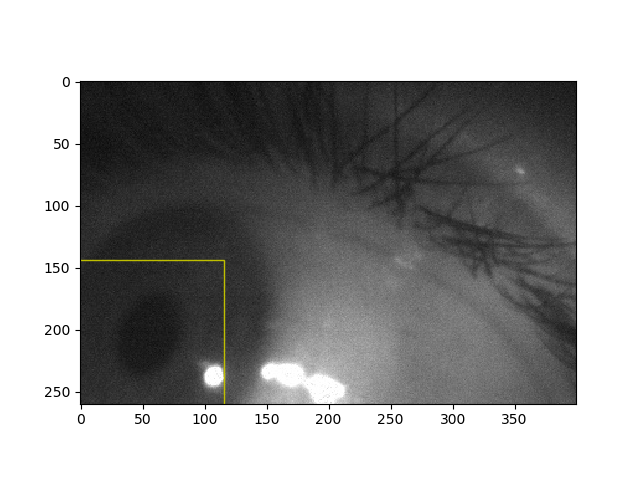

In [17]:
%matplotlib notebook
# Image to display
index=1176

display = np.reshape(images[index], (260,400))
box = targetTrain[index]

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [18]:
# Shuffle data
xtrain, ytrain = shuffle(images, targetTrain, random_state=0)
#xvalid = xtrain[512:]
#xtrain = xtrain[:512]
#yvalid = ytrain[512:]
#ytrain = ytrain[:512]

In [19]:
def model(Xshape):
    
    mod = Sequential()
    mod.add(Conv2D(4, (7, 7), activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0), input_shape=Xshape))
    mod.add(MaxPooling2D(pool_size=(4, 4)))
    
    mod.add(Conv2D(8, (7, 7), activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0)))
    mod.add(MaxPooling2D(pool_size=(4, 4)))

    mod.add(Flatten())
#    mod.add(Dense(256, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.01)))
    mod.add(Dense(128, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.02)))
#    mod.add(Dense(256, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0)))
    mod.add(Dense(2, activation='sigmoid', kernel_initializer='glorot_normal'))
    
    return mod

In [20]:
mymodel = model(xtrain.shape[1:])
opt = optimizers.Adam(lr=0.0001)
mymodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [21]:
# First train with small mini batch size and default learning rate
mymodel.fit(xtrain, ytrain, epochs = 40, batch_size=64)

Epoch 1/40
1782/1782 [==============================] - 71s 40ms/step - loss: 1.6631 - acc: 0.6184
Epoch 2/40
1782/1782 [==============================] - 70s 39ms/step - loss: 0.1630 - acc: 0.7722
Epoch 3/40
1782/1782 [==============================] - 70s 39ms/step - loss: 0.0294 - acc: 0.8171
Epoch 4/40
1782/1782 [==============================] - 70s 40ms/step - loss: 0.0194 - acc: 0.8418
Epoch 5/40
1782/1782 [==============================] - 71s 40ms/step - loss: 0.0184 - acc: 0.8676
Epoch 6/40
1782/1782 [==============================] - 71s 40ms/step - loss: 0.0142 - acc: 0.8911
Epoch 7/40
1782/1782 [==============================] - 71s 40ms/step - loss: 0.0133 - acc: 0.8956
Epoch 8/40
1782/1782 [==============================] - 71s 40ms/step - loss: 0.0138 - acc: 0.9063
Epoch 9/40
1782/1782 [==============================] - 71s 40ms/step - loss: 0.0123 - acc: 0.8984
Epoch 10/40
1782/1782 [==============================] - 70s 39ms/step - loss: 0.0118 - acc: 0.9102
Epoch 11/

In [22]:
# Then train with smaller learning rate and larger batch size
K.set_value(mymodel.optimizer.lr, 0.0005)
mymodel.fit(xtrain, ytrain, epochs = 10, batch_size=128)
K.set_value(mymodel.optimizer.lr, 0.0001)
mymodel.fit(xtrain, ytrain, epochs = 10, batch_size=256)

Epoch 1/10
1782/1782 [==============================] - 72s 40ms/step - loss: 0.0055 - acc: 0.9343
Epoch 2/10
1782/1782 [==============================] - 70s 39ms/step - loss: 0.0041 - acc: 0.9473
Epoch 3/10
1782/1782 [==============================] - 70s 40ms/step - loss: 0.0036 - acc: 0.9444
Epoch 4/10
1782/1782 [==============================] - 72s 40ms/step - loss: 0.0032 - acc: 0.9579
Epoch 5/10
1782/1782 [==============================] - 71s 40ms/step - loss: 0.0031 - acc: 0.9613
Epoch 6/10
1782/1782 [==============================] - 72s 40ms/step - loss: 0.0031 - acc: 0.9557
Epoch 7/10
1782/1782 [==============================] - 71s 40ms/step - loss: 0.0034 - acc: 0.9433
Epoch 8/10
1782/1782 [==============================] - 71s 40ms/step - loss: 0.0032 - acc: 0.9523
Epoch 9/10
1782/1782 [==============================] - 70s 39ms/step - loss: 0.0039 - acc: 0.9484
Epoch 10/10
1782/1782 [==============================] - 71s 40ms/step - loss: 0.0042 - acc: 0.9545
Epoch 1/1

In [23]:
# Make the prediction on all
ypredict = mymodel.predict(images)

<IPython.core.display.Javascript object>


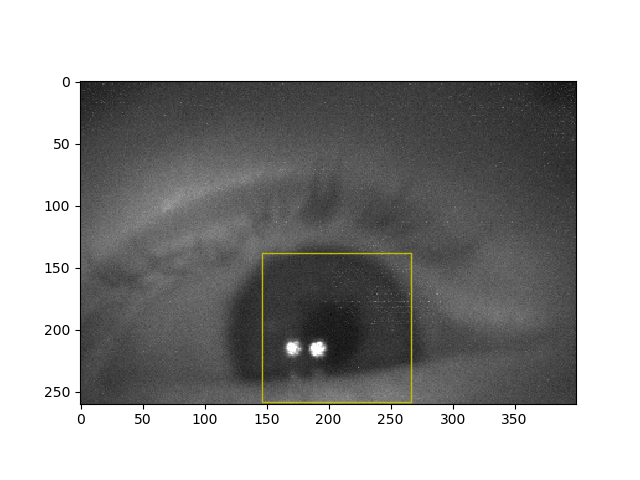

In [34]:
#%matplotlib notebook
index=465

display = np.reshape(images[index], (260,400))
box = ypredict[index]

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [ ]:
# Make the prediction for valid dataset
validPredict = mymodel.predict(xvalid)

In [ ]:
index=14

display = np.reshape(xvalid[index], (260,400))
box = validPredict[index]

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [60]:
# Make the prediction on a totally new dataset
# Read images
newImages = np.zeros((199,260,400))

for i in range(199):
    filename = 'dataHelene/heleneEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    newImages[i] = img

        
newImages = np.reshape(newImages, (newImages.shape[0], newImages.shape[1], newImages.shape[2], 1))

# Rescale images
newImages = newImages/255.

# Make the prediction for valid dataset
newImagesPredict = mymodel.predict(newImages)

<IPython.core.display.Javascript object>


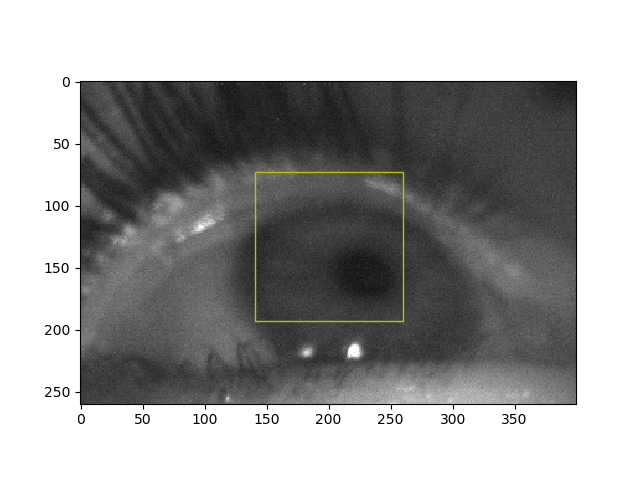

In [91]:
# Image to display
index=59

display = np.reshape(newImages[index], (260,400))
box = newImagesPredict[index]

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()
